## Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

1.1. Данные из прошлого дз
1.2 Изучите стоимости недвижимости
1.3 Изучите распределение квадратуры жилой
2.1.4 Изучите распределение года постройки

## Условие 2: 2 задача

2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
2.2 Изучите распределение этажей домов
2.2 Изучите распределение состояния домов

## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# 1.1. Данные из прошлого дз

In [2]:
df = pd.read_csv("kc_house_data.csv", sep=",")
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 1.2 Изучите стоимости недвижимости

In [3]:
pv = stats.shapiro(df['price'].sample(5000)).pvalue
"Распределение стоимостей {}носит нормальный характер".format(
    "" if pv > 0.05
    else "не "
)

'Распределение стоимостей не носит нормальный характер'

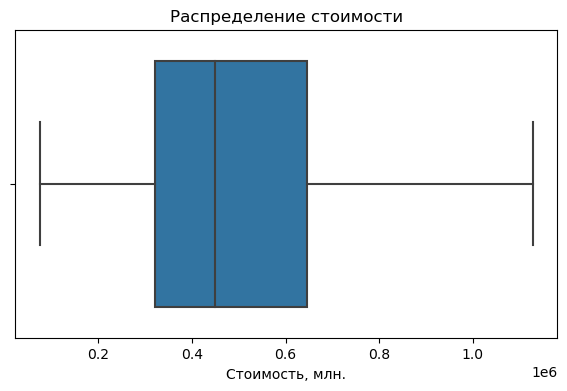

In [4]:
plt.figure(figsize=(7, 4))

sns.boxplot(
    x=df['price'],
    showfliers=False
)

plt.title("Распределение стоимости")
plt.xlabel("Стоимость, млн.");


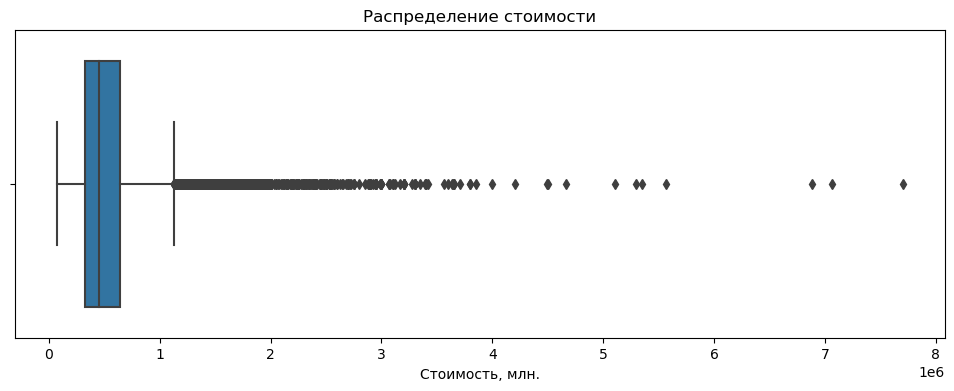

In [5]:
plt.figure(figsize=(12, 4))

sns.boxplot(
    x=df['price']
)
plt.title("Распределение стоимости")
plt.xlabel("Стоимость, млн.");

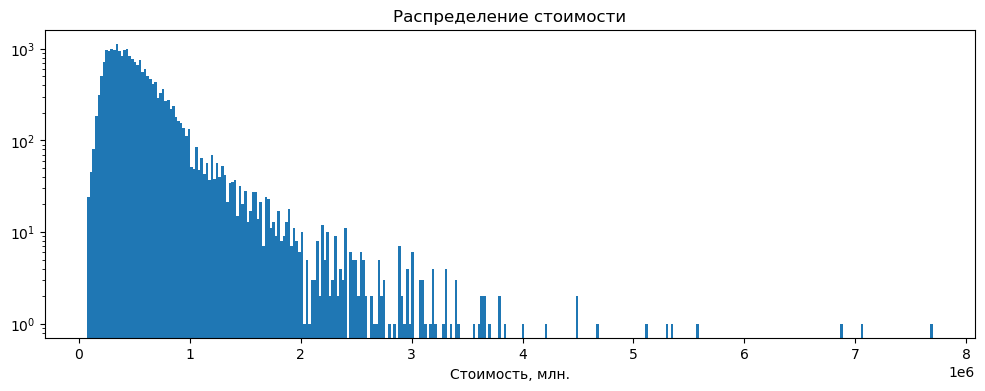

In [6]:
plt.figure(figsize=(12, 4))

plt.hist(
    df['price'],
    bins='auto',
    log=True
)
plt.title("Распределение стоимости")
plt.xlabel("Стоимость, млн.");

## Гистограмма для качественной оценки. По вертикальной оси отложены кол. домов, приходящиеся на автоматически формируемый ценовой отрезок.

## Вывод: Половина домов сосредоточена в ценовом диапазоне от 320 до 645 тыс, основной диапазон цен - от 75 тыс до 1.13 млн. При этом кол. домов плавно снижается при увеличении цены и имеются отдельные дома с существенно более высокой ценой.

# 1.3 Изучите распределение квадратуры жилой площади

In [7]:
pv = stats.shapiro(df['sqft_living'].sample(1000)).pvalue
"Распределение жилых площадей {}носит нормальный характер".format(
    "" if pv > 0.05
    else "не "
)

'Распределение жилых площадей не носит нормальный характер'

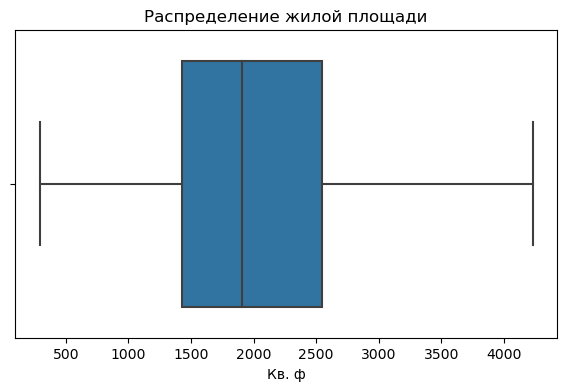

In [8]:
plt.figure(figsize=(7, 4))

sns.boxplot(
    x=df['sqft_living'],
    showfliers=False
)
plt.title("Распределение жилой площади")
plt.xlabel("Кв. ф");

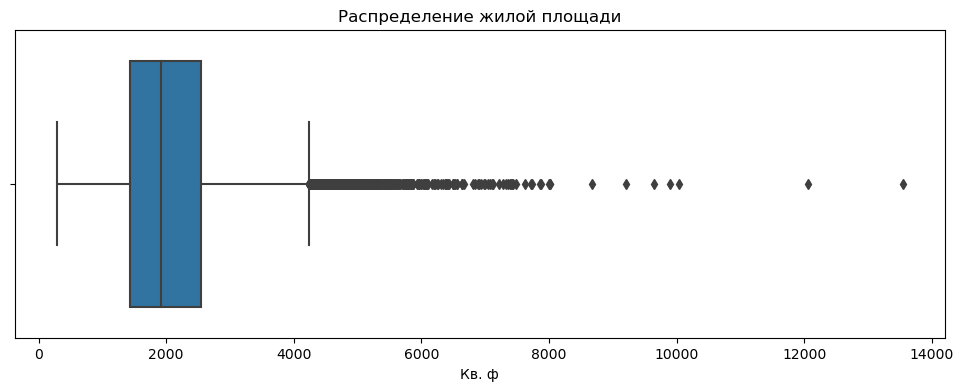

In [9]:
plt.figure(figsize=(12, 4))

sns.boxplot(
    x=df['sqft_living']
)
plt.title("Распределение жилой площади")
plt.xlabel("Кв. ф");

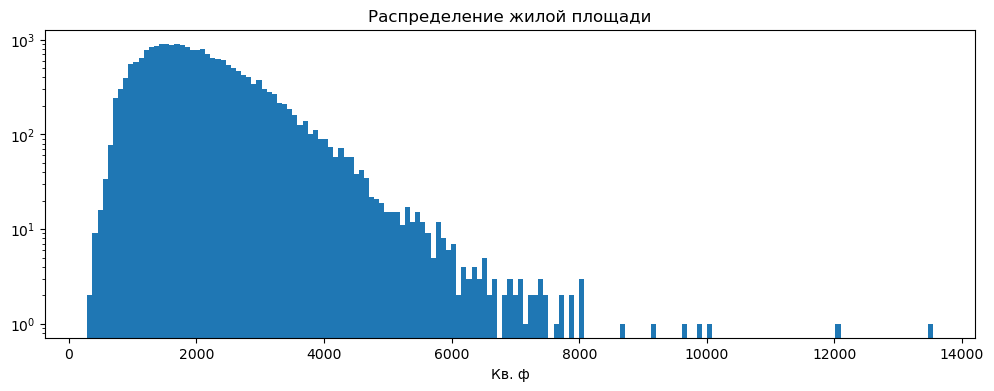

In [10]:
plt.figure(figsize=(12, 4))

plt.hist(
    df['sqft_living'],
    bins='auto',
    log=True
)
plt.title("Распределение жилой площади")
plt.xlabel("Кв. ф");

## Гистограмма для качественной оценки. По вертикальной оси отложены кол. домов, приходящиеся на автоматически формируемый интервал площадей.

## Вывод: Как и в случае с ценой, половина домов сосредоточена в узком диапазоне (от 1427 до 2550 кв.м). Основной диапазон площадей - от 290 до 4.2 тыс кв. футов. При этом кол. домов плавно снижается при увеличении площади и имеются отдельные существенно более просторные дома.

## 1.4 Изучите распределение года постройки

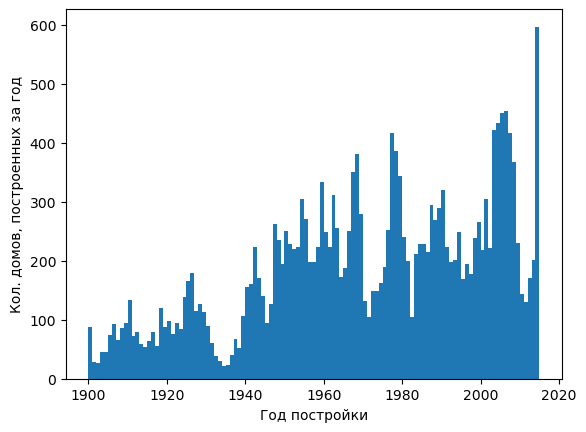

In [11]:
plt.hist(
    df['yr_built'],
    bins=range(df['yr_built'].min(), df['yr_built'].max() + 1)
)
plt.xlabel("Год постройки")
plt.ylabel("Кол. домов, построенных за год");

## Вывод: Наблюдается постепенный рост строительства. Вместе с тем, характерны периодические провалы и всплески, что говорит о большом влиянии внешних факторов, имеющих периодический характер. Наибольший провал в районе 1929-1939 годов - время великой дипрессии.

## 2 Построить график, сделать выводы
## 2.1 Изучите распределение домов от наличия вида на набережную

In [12]:
def calcExplodes(data):
    exp = []
    k = 1
    for val in data.values:
        if val < data.values.sum() / 20:
            exp.append(0.3 * k)
            k += 1
        else:
            exp.append(0)
    return exp

Text(0.5, 1.0, 'Распределение домов в зависимости от наличия вида на набережную')

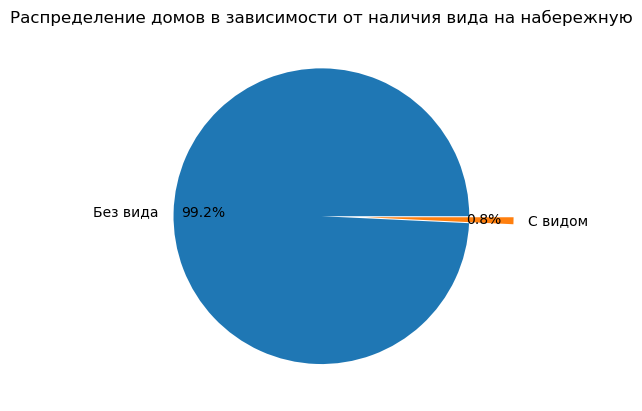

In [13]:
data = df['waterfront'].value_counts()
data.index = [
    "Без вида",
    "С видом"
]
plt.pie(
    data.values,
    labels=data.index,
    autopct='%1.1f%%',
    pctdistance=0.8,
    explode=calcExplodes(data)
)
plt.title("Распределение домов в зависимости от наличия вида на набережную")

## 2.2 Изучите распределение этажей домов

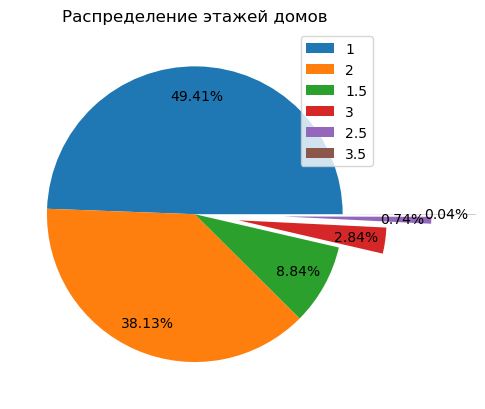

In [14]:
data = df['floors'].value_counts()
data.index = [
    str(el).split(".")[0]
    if el % 1 == 0
    else str(el)
    for el in data.index
]

plt.pie(
    data,
    autopct='%1.2f%%',
    pctdistance=0.8,
    explode=calcExplodes(data)
)

plt.legend(data.index)
plt.title("Распределение этажей домов");

## 2.3 Изучите распределение состояния домов

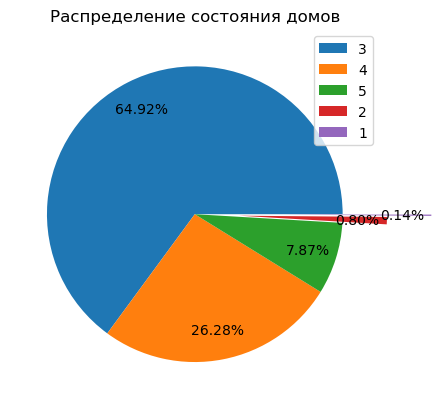

In [15]:
data = df['condition'].value_counts()

plt.pie(
    data,
    autopct='%1.2f%%',
    pctdistance=0.8,
    explode=calcExplodes(data)
)

plt.legend(data.index)
plt.title("Распределение состояния домов");

## 3 Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

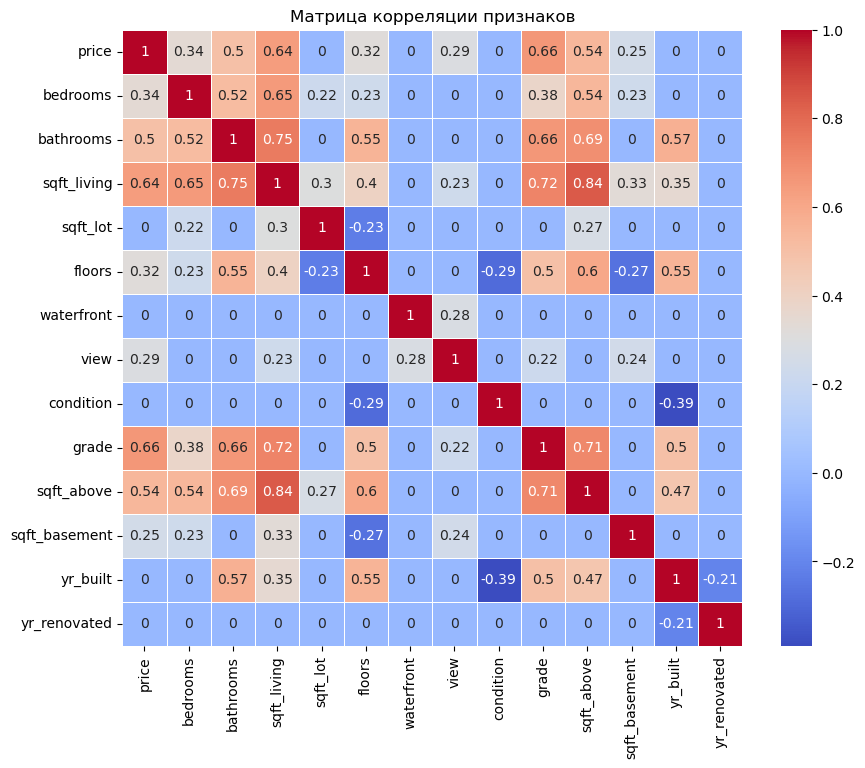

In [16]:
plt.figure(figsize=(10, 8))

corrMatrix = round(df.drop(
    columns=['id', 'date', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
).corr(method='spearman'), 2)
corrMatrix[abs(corrMatrix) < 0.2] = 0

sns.heatmap(corrMatrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title("Матрица корреляции признаков");

Вывод: Если рассматривать цену дома, то не найдена корреляция с этажностью и площадью участка, а также состоянием. Зато цена сильно зависит от жилой площади и в меньшей степени от количества спален и ванных. То, что цена зависит от площади чердака, говорит о большом распростанении 1-но этажных домов.

Зависимость цены от жилой площади:

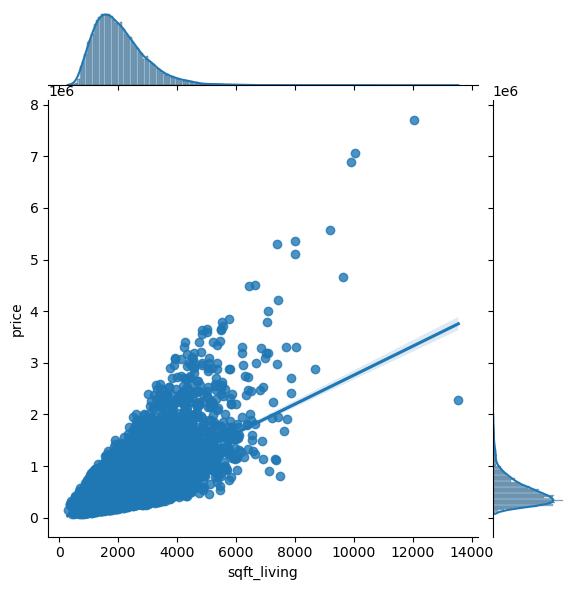

In [17]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg')

plt.xlabel("Жилая площадь, кв. м")
plt.ylabel("Цена дома, млн");

Вывод: Имеется выраженная зависимость цены от жилой площади, зависимость более чёткая в нижнем ценовом диапазоне и для небольших площадей. Большой разброс цен домов большой площади говорит о влиянии других факторов и специфичности требований покупателей.

In [18]:
def formDepData (col1, col2, df):
    data = df.groupby(col1) \
        .agg({col2: 'mean'}) \
        .sort_index().reset_index()
    
    data[col1] = data[col1].apply(
        lambda val:
            str(val) 
    )

    return data

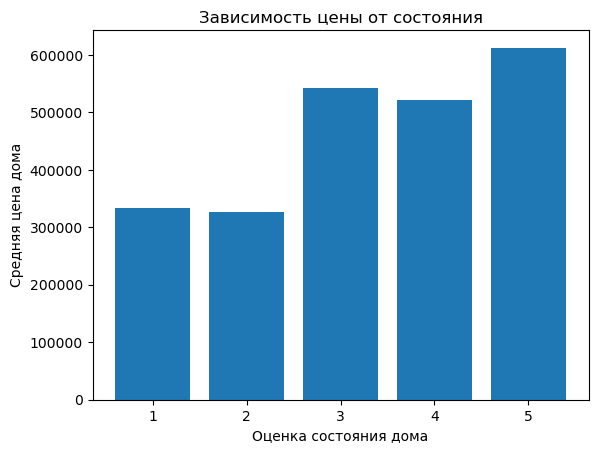

In [19]:
data = formDepData('condition', 'price', df)

plt.bar(
    data['condition'],
    data['price']
)

plt.title("Зависимость цены от состояния")
plt.xlabel("Оценка состояния дома")
plt.ylabel("Средняя цена дома");

Вывод: Не смотря на низкий коэффициент корреляции, на диаграмме прослеживается некоторое увеличение цены для домов в лучшем состоянии. Слабая выраженность зависимости связана с малой долей домов в плохом состоянии.

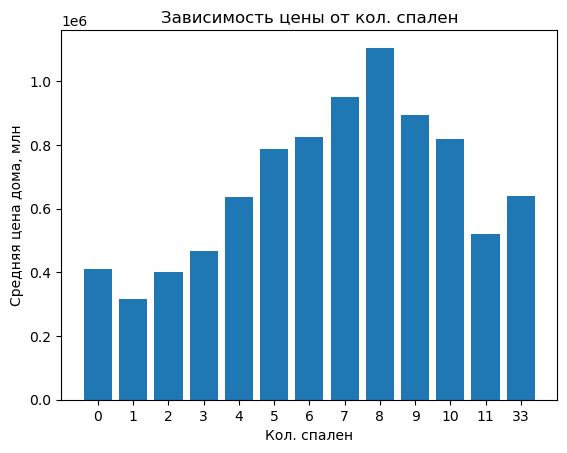

In [20]:
data = formDepData('bedrooms', 'price', df)

plt.bar(
    data['bedrooms'],
    data['price']
)

plt.title("Зависимость цены от кол. спален")
plt.xlabel("Кол. спален")
plt.ylabel("Средняя цена дома, млн");

Вывод: Дома без спален, ориентированы на какие-то специальые требования (возможно, студии), что делает их немного дороже, чем дома с 2-мя спальнями. Для домов с 1 по 8 спален прослеживается равномерный рост цены. Дома с большим количеством спален, ориентированы на несколько семей, имеют более простые условия, и уменьшаются в цене.

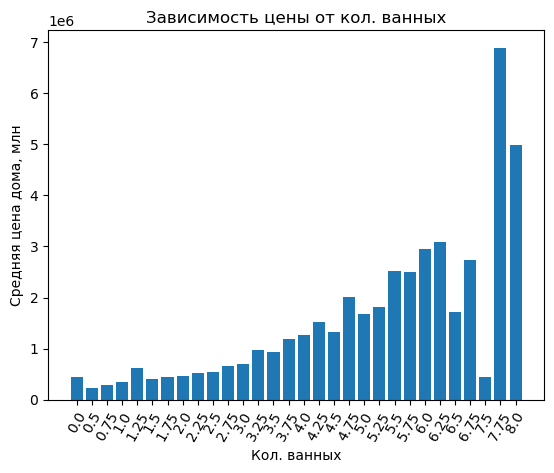

In [21]:
data = formDepData('bathrooms', 'price', df)

plt.bar(
    data['bathrooms'],
    data['price']
)

plt.xticks(rotation=60)
plt.title("Зависимость цены от кол. ванных")
plt.xlabel("Кол. ванных")
plt.ylabel("Средняя цена дома, млн");

Вывод: Наблюдается практически равномерный рост цен при увеличении числа ванных. Есть выбросы, соответствующие, домам типа townhouse.

In [1]:
data = formDepData('view', 'price', df)

plt.bar(
    data['view'],
    data['price']
)

plt.title("Зависимость цены от вида")
plt.xlabel("Рейтинг вида")
plt.ylabel("Средняя цена дома, млн");

NameError: name 'formDepData' is not defined

Вывод: Не смотря на низкий коэффициент корреляции, на диаграмме прослеживается увеличение цены для домов с лучшим видом. Слабая выраженность зависимости говорит о большом влиянии других факторов.

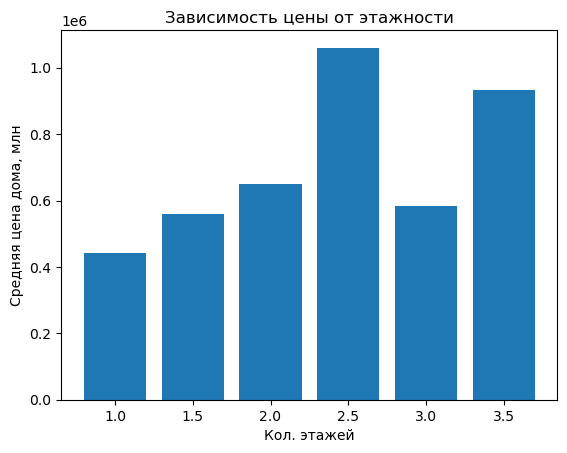

In [23]:
data = formDepData('floors', 'price', df)

plt.bar(
    data['floors'],
    data['price']
)

plt.title("Зависимость цены от этажности")
plt.xlabel("Кол. этажей")
plt.ylabel("Средняя цена дома, млн");

Вывод: Для домов с этажностью с 1 по 2.5 прослеживается равномерный рост цены. Дома с большей этажностью, ориентированы на несколько семей, имеют более простые условия, и меньшую цену, которая, также имеет тенденцию к увеличению при добавлении полуэтажа. Изменение закономерности для домов с этажностью 3.5 может быть связана с очень небольшой их долей.